# Github Data Analysis

O GitHub emprega várias funcionalidades sociais, como follow, watch e fork. 
Os desenvolvedores podem acompanhar as atividades de outros e estar ciente das mudanças nos projetos usando essas 
ferramentas na comunidade.

Muitas redes sociais interessantes de desenvolvedores podem ser construídas. 
Por exemplo, a relação a seguir é criada quando um desenvolvedor clica no botão "Seguir" no perfil de outro 
desenvolvedor e, em seguida, as relações de acompanhamento entre os desenvolvedores podem formar uma rede social 
que aqui é chamada de rede de seguidores.

**Algumas questões relevantes para analisar essa rede são:**


## Parte 1: Preprocessamento - Users_Followers

In [1]:
import pandas as pd
import numpy as np
import re

# from bs4 import BeautifulSoup
# import requests as rq
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.plotting import figure, show
from bokeh.models import Range1d, NumeralTickFormatter, FixedTicker, Legend
from bokeh.palettes import Set1_7, RdBu5, RdBu11
from bokeh.io import output_notebook

output_notebook()
% matplotlib inline

Loading BokehJS ...

## Carregamento dos dados

In [2]:
# load dataset

gh_users_followers = pd.read_csv('../data/users__followers.csv')
gh_users_followers.head()

,User,Followers,nFs,All_Followers,nF
0,fernandocastor,"joselitojunior1,filipeximenes,renatooliveira,h...",48,"guiocavalcanti,adrianomelo,tacsio,x8lucas8x,fj...",129
1,filipeximenes,"luanfonceca,gileno,renatooliveira,luiztiago,fe...",40,"luisgabriel,renatooliveira,marciobarbosa,anton...",177
2,simoneas02,"talitaoliveira,ktquez,pcstl,karlafalcao,kessia...",37,"ElsonBarcelos,IsabelaDePaula,sergiockd,douglas...",250
3,renatooliveira,"joselitojunior1,luanfonceca,gileno,filipeximen...",35,"adrianomelo,x8lucas8x,luisgabriel,joselitojuni...",166
4,lailsonbm,"luanfonceca,gileno,filipeximenes,renatooliveir...",29,"kraudio,lucasmncastro,chillicoder,lmarinho,gvc...",73


In [3]:
gh_users_followers.describe()

,nFs,nF
count,1992.000000,1992.000000
mean,1.164659,6.074297
std,3.250622,25.510528
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,4.000000
max,48.000000,570.000000


## Normalizacao

In [4]:
# normalizing
def fs_to_dataframe(fs):
    return pd.DataFrame({'User': re.split('\W+', str(fs))})

gh_users_followers['All_Followers'] = gh_users_followers['All_Followers'].fillna('').apply(fs_to_dataframe) # apenas para simplificar operacoes 

gh_users_followers.head()

,User,Followers,nFs,All_Followers,nF
0,fernandocastor,"joselitojunior1,filipeximenes,renatooliveira,h...",48,User 0 guiocavalcanti ...,129
1,filipeximenes,"luanfonceca,gileno,renatooliveira,luiztiago,fe...",40,User 0 luisgabr...,177
2,simoneas02,"talitaoliveira,ktquez,pcstl,karlafalcao,kessia...",37,User 0 ElsonBarcelos ...,250
3,renatooliveira,"joselitojunior1,luanfonceca,gileno,filipeximen...",35,User 0 adrianomelo 1 ...,166
4,lailsonbm,"luanfonceca,gileno,filipeximenes,renatooliveir...",29,User 0 kraudio 1 ...,73


## Filtrar seguidores Recifenses

Gostariamos de criar outra coluna contendo apenas os seguidores Recifenses: Para isso vamos fazer um merge full inner(intersecao) de cada lista de seguidores com a lista de usuários (que são recifenses)

In [5]:
# Ordenado por TODOS OS SEGUIDORES
# (mantendo no DataFrame todos os seguidores(recifenses e não recifenses))
gh_users_followers['Followers'] = gh_users_followers['All_Followers'].apply(pd.DataFrame({'User':gh_users_followers['User']}).merge)

gh_users_followers['nFs'] = gh_users_followers['Followers'].apply(len)

gh_users_followers.head()

,User,Followers,nFs,All_Followers,nF
0,fernandocastor,User 0 filipeximenes 1 r...,48,User 0 guiocavalcanti ...,129
1,filipeximenes,User 0 fernandocastor ...,40,User 0 luisgabr...,177
2,simoneas02,User 0 talitaolive...,37,User 0 ElsonBarcelos ...,250
3,renatooliveira,User 0 fernandocastor 1 ...,35,User 0 adrianomelo 1 ...,166
4,lailsonbm,User 0 filipeximenes 1 r...,29,User 0 kraudio 1 ...,73


In [36]:
# Ordenado por SEGUIDORES RECIFENSES
gh_users_followers = gh_users_followers.loc[:, ['User', 'Followers', 'nFs', 'All_Followers', 'nF']]
gh_users_followers.sort_values('nFs', axis=0, ascending=False, inplace=True)

gh_users_followers[['User', 'Followers', 'nFs']][0:600]

,User,Followers,nFs
0,fernandocastor,User 0 filipeximenes 1 r...,48
1,filipeximenes,User 0 fernandocastor ...,40
2,simoneas02,User 0 talitaolive...,37
3,renatooliveira,User 0 fernandocastor 1 ...,35
4,lailsonbm,User 0 filipeximenes 1 r...,29
5,marcelcaraciolo,User 0 filipeximenes 1 ...,28
6,guilhermefarias,User 0 filipeximenes 1 ...,25
7,henvic,User 0 guilhermefarias 1 g...,25
9,clovisdasilvaneto,User 0 simoneas02 1 ...,24
8,guiocavalcanti,User 0 filipeximenes 1 r...,24


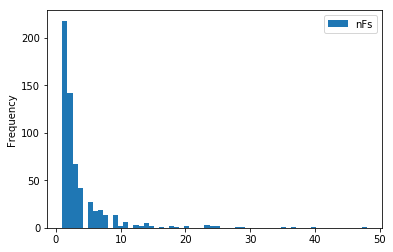

In [7]:
gh_users_followers[['nFs']][0:600].plot.hist(bins=60)

In [8]:
gh_users_followers.describe()

,nFs,nF
count,1992.000000,1992.000000
mean,1.164659,6.074297
std,3.250622,25.510528
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,4.000000
max,48.000000,570.000000



# Parte 2: Análise dos seguidores - Users_Followers

In [9]:
# numero de usuarios recifenses 
gh_users_followers['User'].count()

1992

In [10]:
# numero de usuarios recifenses sem seguidores (recifenses ou nao)
users_0_fs = [str(n) for n in gh_users_followers.User[gh_users_followers['nF'] == 0]]
len(users_0_fs)

889

In [11]:
# numero de usuarios recifenses com seguidores (recifenses ou nao)
users_fs = [str(n) for n in gh_users_followers.User[gh_users_followers['nF'] != 0]]
len(users_fs)

1103

In [12]:
# numero de usuarios recifenses sem seguidores
users_0_fs = [str(n) for n in gh_users_followers.User[gh_users_followers['nFs'] == 0]]
len(users_0_fs)

1300

In [13]:
# numero de usuarios recifenses com seguidores recifenses 
users_fs = [str(n) for n in gh_users_followers.User[gh_users_followers['nFs'] != 0]]
len(users_fs)

692

In [14]:

print(1300-889)
print(1103-692)
# Tem pelo menos 411 usuários que não tem seguidores Recifenses

411
411


In [15]:
# numero de arestas (somatorio de seguidores RECIFENSES)
gh_users_followers.nFs.sum()

2320

In [16]:
# numero de arestas (somatorio do total de seguidores)
gh_users_followers.nF.sum()

12100

In [17]:
print(12100-2320)

# Ou seja existem 9780 arestas entrando na comunidade de desenvolvedores Recifenses o que 
# mostra que a sub-rede recifense é bem conecctada com a rede mundial do GitHub

9780


# Construção do Grafo de seguidores para análise

A nossa principal análise envolve a criação de um grafo direcionado em que cada aresta indica a relação "X segue Y"

**Construção do grafo de seguidores.** Dado uma lista de usuarios e pra cada usuario a lista de seguidores criamos o grafo de seguidores  <GRAFO DE SEGUIDORES> = onde pra cada relação A segue B é criada uma aresta direcionada onde o ponto de origem é o A e o de chegada é o B (Lista de adjacências).

** Nós:** Usuarios do github
        
** Arestas:** Relacao "seguir"
 

** Analise do Grafo e Discussão dos resultados obtidos **


* **GRAU**
    * Densidade = 0.001 (visualização dos nos vs arestas) - graph2 e graph3
        * baixa densidade = baixa fração de arestas (2152)

    * Distribuição de grau
        * Lei de potencia: Poucos nós com muitos seguidores
        * Grau de entrada: Quantidade de seguidores totais (recifenses ou não) (All-In-degree)
        * Grau de entrada: Quantidade de seguidores recifenses (In-Degree)
    * Grau médio indica nivel de reciprocidade = 1.133 (visualização distribuição dos graus) - graph 4


* **CAMINHO**
    * Efeito Mundo Pequeno
    * Experimento de Milgram: Six degrees of separation
    * Caminho Medio: Diametro Da Rede = 13 (visualizacao do maior caminho)
    * Tamanho do Caminho medio = 5.067 
        * Rede de mundo pequeno (Visualização de todos os caminhos de tamanho 5)


* **ARESTAS** 

    * Conectividade (visualizacao - graph5)
        * O tamanho indica betweeness (intermediacao), a cor indica componentes conectados
        * Nos conectados e soltos quase meio a meio
        * Number of Weakly Connected Components: 1157
        * Number of Strongly Connected Components: 1503
        * Transitividade: Coeficiente de Clusterizaçao médio = 0.058
        * Rede muito desconectada


* **VERTICES**

    * Influencia/Autoridade/Importancia (Visualização - graph6)
        * O tamanho dos nos indica autoridade (importância)
        * A cor indica componentes conectados
        * Pra um no ser importante não precisa ser fortemente conectado
        
    * Centralidade: 
        * PageRank (visualizacao) - graph8
        * Eigenvector (visualizacao) - graph 9
        * Betweeness (visualizacao) - graph5

    * Hubs  (1 cluster gigante 1 varios pequenos) (visualização dos Hubs)

    * Egocentrismo (Filtros)





** criacao dos nos**

In [18]:
# todos os usuarios recifenses (nem todos serao considerados como nos do graph - ver Parte 2) 
# nodes_preview = gh_users_followers.loc[:,['User','nFs', 'nF']]
# nodes_preview.columns = ['Id', 'In-Degree', 'All-In-Degree']

# nodes_preview.head()

** criacao das arestas**

In [19]:
# def create_edges_df(batches):
#     return pd.concat(batches,
#         ignore_index=True)

# pairs = zip(gh_users_followers.User, gh_users_followers.Followers)

# edges_df = create_edges_df([pd.DataFrame([{'Source':str(f), 'Target':str(u)} for f in fs['User']]) for (u,fs) in pairs])
# edges_df.head()
# edges_df.to_csv('../data/recife/edges.csv', index=False)

In [20]:
# formatando para exportar

# gh_users_followers['Followers'] = gh_users_followers['Followers'].apply(lambda x: x.apply(','.join))
# gh_users_followers['All_Followers'] = gh_users_followers['All_Followers'].apply(lambda x: x.apply(','.join))

# gh_users_followers.head()
# gh_users_followers.to_csv('../data/recife/users__followers.csv', index=False)

In [21]:
# revendo o numero de arestas
edges = pd.read_csv('../data/edges.csv')
edges.head()

,Source,Target
0,joselitojunior1,fernandocastor
1,filipeximenes,fernandocastor
2,renatooliveira,fernandocastor
3,henvic,fernandocastor
4,fjsj,fernandocastor


**- Número de nós considerados**

Note que como estes nós pertencem a uma aresta, eles representam os usuários que tem seguidores e/ou seguem alguém.

In [22]:

# (usuarios recifenses, excluidos os que não tem seguidores se e somente se não seguem ninguem)
len(pd.unique(edges[['Source','Target']].values.ravel()))


828

In [23]:
# distribuicao do Grau
gh_users_followers.nFs.value_counts()


0     1300
1      310
2      142
3       67
4       42
5       27
7       19
6       18
8       14
9       14
11       6
14       5
12       3
23       3
20       2
13       2
18       2
10       2
15       2
24       2
25       2
29       1
37       1
35       1
16       1
28       1
19       1
40       1
48       1
Name: nFs, dtype: int64

In [24]:
# distribuicao do grau - usuarios por ocorrencias da quantidade de seguidores 
groupby_nfs = gh_users_followers.groupby('nFs')
groupby_nfs['User'].apply( ','.join)

nFs
0     santojon,renatofilho,afelipefernandes,johnmayk...
1     filipecabraal,leleofg,deyvisonbm,alexjosesilva...
2     andredm,amandasavluchinske,SandroSena,sfilhu,o...
3     andersongns,rcaval,raquelguimaraes,alocjr,anto...
4     setanta,arineto,guilhermebm,soikmd2,AnnyChien,...
5     jonathanslima,chocoelho,ericbbraga,Leviterus,d...
6     TigerRobocop,fltiago,paulolieuthier,albertmour...
7     peaonunes,pcstl,rasoliveira,allanragec,henriqu...
8     frankjuniorr,lhaisrs,JoaoGFarias,lipse,horacio...
9     felipedealbuquerque,roselmamendes,embs,victorc...
10                              Cisneiros,miguelarauj1o
11    lmarinho,leopoldomt,karlafalcao,irgmedeiros,br...
12           marcellustavares,brunnogomes,jordanamorais
13                            brunofarache,alexpessoajr
14    vinicius3w,thiagodiniz,diegonvs,victorlaerte,a...
15                                interaminense,dakerfp
16                                           pauloborba
18                                        gv

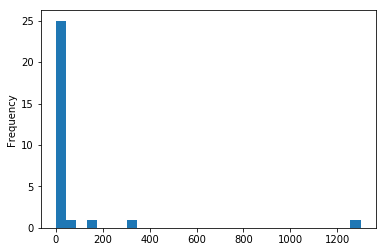

In [25]:
gh_users_followers.nFs.value_counts().plot.hist(bins=30)

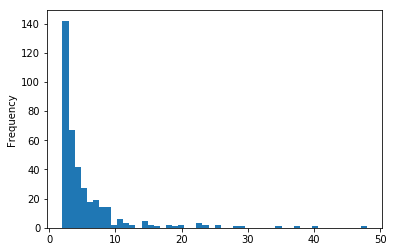

In [26]:
# TODO: colocar legendas
gh_users_followers['nFs'][gh_users_followers.nFs>1].plot.hist(bins=50)


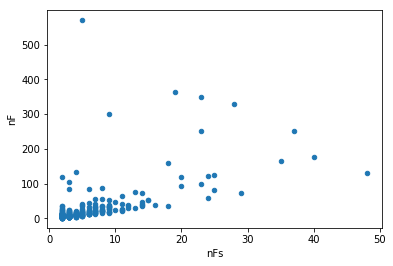

In [27]:
gh_users_followers[gh_users_followers.nFs>1].plot.scatter(x='nFs', y='nF')

# Parte 3: Métricas obtidas no Gephi

In [32]:
graph_data = pd.read_csv('../data/graph_data.csv')

# nodes_data.columns = ['User', 'In_Degree', 'Out_Degree', 'Degree', 'Modularity_Class', 'Page_Rank', 'Eccentricity_Centrality', 'Closness_Centrality', 'Betweeness_Centrality', 'EigenVector_Centrality']
# nodes_data.sort_values('In_Degree', axis=0, ascending=False, inplace=True)
# nodes_data.to_csv('../data/recife/nodes_data.csv', index=False)

graph_data.head()

,User,In_Degree,Out_Degree,Degree,Modularity_Class,Page_Rank,Eccentricity_Centrality,Closness_Centrality,Betweeness_Centrality,EigenVector_Centrality
0,fernandocastor,48,7,55,6,0.012520,8,0.253469,37787.361925,0.751562
1,filipeximenes,40,32,72,0,0.014185,9,0.267709,40297.561868,1.000000
2,simoneas02,37,26,63,9,0.011433,10,0.268627,40894.607104,0.211671
3,renatooliveira,35,28,63,0,0.010550,9,0.258613,26763.575801,0.994672
4,lailsonbm,29,1,30,0,0.013151,11,0.149686,1142.658235,0.838433


In [43]:
graph_data.sort_values('EigenVector_Centrality', axis=0, ascending=False, inplace=True)
graph_data


,User,In_Degree,Out_Degree,Degree,Modularity_Class,Page_Rank,Eccentricity_Centrality,Closness_Centrality,Betweeness_Centrality,EigenVector_Centrality
1,filipeximenes,40,32,72,0,0.014185,9,0.267709,40297.561868,1.000000
3,renatooliveira,35,28,63,0,0.010550,9,0.258613,26763.575801,0.994672
4,lailsonbm,29,1,30,0,0.013151,11,0.149686,1142.658235,0.838433
0,fernandocastor,48,7,55,6,0.012520,8,0.253469,37787.361925,0.751562
12,gileno,23,15,38,0,0.005235,10,0.240879,4819.658485,0.692536
5,marcelcaraciolo,28,12,40,0,0.004972,10,0.232203,12484.609240,0.687211
16,gvc,18,5,23,0,0.010609,9,0.213230,5483.161148,0.656756
11,arthuralvim,23,46,69,0,0.005948,9,0.280450,37270.801767,0.642351
13,fjsj,20,26,46,0,0.003873,9,0.260085,5794.569877,0.617564
6,henvic,25,15,40,5,0.011471,8,0.248752,34297.005176,0.585929


**Legenda Modularity_Class**. Colocamos:  
- \-2 para as "comunidades" de tamanho 2
- \-3 para as "comunidades" de tamanho 3

In [ ]:
nodes_data.describe()

In [ ]:
nodes_data.Modularity_Class.plot.hist()